In [189]:
!pip install fredapi > /dev/null

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
import time
import os
import ssl
import certifi

# Disable SSL warnings
ssl._create_default_https_context = ssl.create_default_context(cafile=certifi.where())
load_dotenv()
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500) # maximum number of columns to display
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # color of plots

fred_api_key = os.getenv('FRED_API_KEY')

from fredapi import Fred



# 1. Create the Fred object

In [191]:
fred = Fred(api_key=fred_api_key)

# 2. Search for economic data series

In [219]:
sp_search = fred.search('S&P', order_by = 'popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-10-01,2025-10-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-09-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-01 09:07:11-05:00,98,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-10-01,2025-10-01,S&P 500,2015-10-02,2025-10-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-10-01 19:01:52-05:00,92,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-10-01,2025-10-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-09-30 08:11:02-05:00,87,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-10-01,2025-10-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-09-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-01 09:07:15-05:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-10-01,2025-10-01,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-09-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-01 09:14:04-05:00,84,The ICE BofA Option-Adjusted Spreads (OASs) ar...


sp_search.head()

# 3. Pull Raw Data and Plot

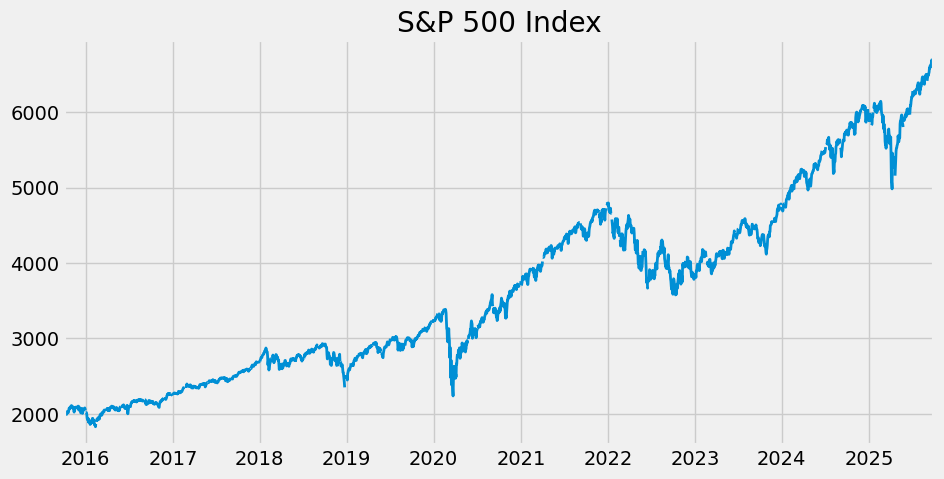

In [220]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500 Index', lw=2)
plt.show()

# 4. Pull and Join Multiple Data Series

In [278]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2025-10-16,2025-10-16,Unemployment Rate in California,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:54:02-05:00,68,None
TXUR,TXUR,2025-10-16,2025-10-16,Unemployment Rate in Texas,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:53:03-05:00,56,None
NYUR,NYUR,2025-10-16,2025-10-16,Unemployment Rate in New York,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:53:04-05:00,56,None
FLUR,FLUR,2025-10-16,2025-10-16,Unemployment Rate in Florida,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:54:02-05:00,53,None
ALUR,ALUR,2025-10-16,2025-10-16,Unemployment Rate in Alabama,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:54:03-05:00,46,None
GAUR,GAUR,2025-10-16,2025-10-16,Unemployment Rate in Georgia,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:54:03-05:00,41,None
VAUR,VAUR,2025-10-16,2025-10-16,Unemployment Rate in Virginia,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:53:06-05:00,44,None
OHUR,OHUR,2025-10-16,2025-10-16,Unemployment Rate in Ohio,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:53:05-05:00,44,None
MIUR,MIUR,2025-10-16,2025-10-16,Unemployment Rate in Michigan,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:53:05-05:00,40,None


In [285]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)#.drop(['LASMT534266000000003','LASMT261982000000003'])

In [287]:
unemp_results.drop(columns=['LASMT534266000000003','LASMT261982000000003'], inplace=True)
unemp_results

,CAUR,TXUR,NYUR,FLUR,ALUR,GAUR,VAUR,OHUR,MIUR,PAUR,MAUR,ILUR,NCUR,AZUR,ORUR,COUR,WAUR,MSUR,NJUR,KYUR,WIUR,LAUR,DCUR,TNUR,MNUR,PRUR,SCUR,AKUR,WVUR,OKUR,CTUR,MDUR,INUR,NMUR,NDUR,NVUR
1976-01-01,9.2,5.8,10.3,9.6,6.7,8.4,6.0,8.1,9.9,8.1,10.6,6.6,6.5,10.2,9.5,5.8,8.5,6.6,10.2,5.6,5.8,6.3,8.8,6.0,5.9,19.6,7.3,7.1,7.4,5.8,9.7,6.5,6.6,8.6,3.5,9.2
1976-02-01,9.2,5.8,10.3,9.7,6.6,8.4,6.0,8.1,9.9,8.1,10.6,6.6,6.5,10.2,9.5,5.8,8.5,6.6,10.2,5.6,5.8,6.3,8.8,6.0,5.9,19.5,7.3,7.1,7.4,5.8,9.7,6.5,6.6,8.6,3.5,9.2
1976-03-01,9.1,5.9,10.2,9.6,6.6,8.3,6.0,8.1,9.9,8.1,10.6,6.6,6.5,10.2,9.4,5.7,8.5,6.6,10.2,5.6,5.8,6.3,8.7,6.0,5.8,19.3,7.3,7.0,7.4,5.8,9.7,6.5,6.5,8.6,3.5,9.2
1976-04-01,9.0,5.9,10.2,9.5,6.5,8.2,5.9,7.9,9.8,8.1,10.4,6.6,6.3,10.0,9.3,5.6,8.5,6.4,10.3,5.6,5.7,6.4,8.6,6.0,5.7,19.0,7.1,7.0,7.4,5.7,9.6,6.5,6.3,8.6,3.6,9.0
1976-05-01,8.9,6.0,10.2,9.3,6.4,8.1,5.8,7.8,9.6,8.1,10.1,6.6,6.1,9.8,9.1,5.6,8.5,6.3,10.3,5.5,5.6,6.5,8.5,5.9,5.6,18.9,7.0,7.0,7.4,5.7,9.4,6.6,6.0,8.6,3.6,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,5.3,4.1,4.2,3.7,3.3,3.6,3.3,4.9,5.5,3.9,4.6,4.8,3.7,4.1,4.7,4.8,4.4,4.0,4.8,5.2,3.3,4.4,5.8,3.5,3.2,5.5,4.2,4.7,3.8,3.2,3.7,3.1,3.9,4.3,2.6,5.6
2025-05-01,5.3,4.1,4.0,3.7,3.3,3.5,3.4,4.9,5.4,3.9,4.8,4.8,3.7,4.1,4.8,4.8,4.5,4.0,4.8,5.0,3.3,4.5,5.9,3.5,3.3,5.5,4.1,4.7,3.7,3.1,3.8,3.2,3.7,4.2,2.5,5.5
2025-06-01,5.4,4.0,4.0,3.7,3.2,3.5,3.5,4.9,5.3,4.0,4.8,4.6,3.7,4.1,4.9,4.7,4.5,4.0,4.9,4.9,3.2,4.5,5.9,3.5,3.3,5.5,4.1,4.7,3.7,3.1,3.8,3.3,3.6,4.2,2.5,5.4
2025-07-01,5.5,4.0,4.0,3.7,3.0,3.4,3.6,5.0,5.3,4.0,4.8,4.6,3.7,4.1,4.9,4.5,4.5,3.9,4.9,4.9,3.1,4.5,6.0,3.6,3.5,5.5,4.2,4.8,3.7,3.1,3.8,3.4,3.6,4.2,2.5,5.4


<Axes: >

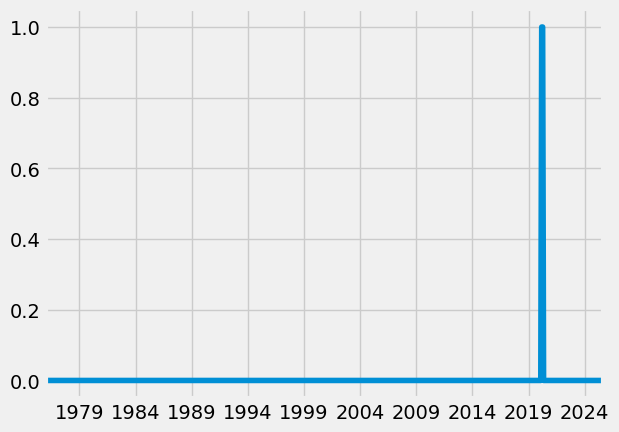

In [289]:
unemp_results.isna().sum(axis=1).plot()

In [293]:
unemp_states = unemp_results.copy()  #.drop('UNRATE', axis=1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
unemp_states

,California,Texas,New York,Florida,Alabama,Georgia,Virginia,Ohio,Michigan,Pennsylvania,Massachusetts,Illinois,North Carolina,Arizona,Oregon,Colorado,Washington,Mississippi,New Jersey,Kentucky,Wisconsin,Louisiana,the District of Columbia,Tennessee,Minnesota,Puerto Rico,South Carolina,Alaska,West Virginia,Oklahoma,Connecticut,Maryland,Indiana,New Mexico,North Dakota,Nevada
1976-01-01,9.2,5.8,10.3,9.6,6.7,8.4,6.0,8.1,9.9,8.1,10.6,6.6,6.5,10.2,9.5,5.8,8.5,6.6,10.2,5.6,5.8,6.3,8.8,6.0,5.9,19.6,7.3,7.1,7.4,5.8,9.7,6.5,6.6,8.6,3.5,9.2
1976-02-01,9.2,5.8,10.3,9.7,6.6,8.4,6.0,8.1,9.9,8.1,10.6,6.6,6.5,10.2,9.5,5.8,8.5,6.6,10.2,5.6,5.8,6.3,8.8,6.0,5.9,19.5,7.3,7.1,7.4,5.8,9.7,6.5,6.6,8.6,3.5,9.2
1976-03-01,9.1,5.9,10.2,9.6,6.6,8.3,6.0,8.1,9.9,8.1,10.6,6.6,6.5,10.2,9.4,5.7,8.5,6.6,10.2,5.6,5.8,6.3,8.7,6.0,5.8,19.3,7.3,7.0,7.4,5.8,9.7,6.5,6.5,8.6,3.5,9.2
1976-04-01,9.0,5.9,10.2,9.5,6.5,8.2,5.9,7.9,9.8,8.1,10.4,6.6,6.3,10.0,9.3,5.6,8.5,6.4,10.3,5.6,5.7,6.4,8.6,6.0,5.7,19.0,7.1,7.0,7.4,5.7,9.6,6.5,6.3,8.6,3.6,9.0
1976-05-01,8.9,6.0,10.2,9.3,6.4,8.1,5.8,7.8,9.6,8.1,10.1,6.6,6.1,9.8,9.1,5.6,8.5,6.3,10.3,5.5,5.6,6.5,8.5,5.9,5.6,18.9,7.0,7.0,7.4,5.7,9.4,6.6,6.0,8.6,3.6,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,5.3,4.1,4.2,3.7,3.3,3.6,3.3,4.9,5.5,3.9,4.6,4.8,3.7,4.1,4.7,4.8,4.4,4.0,4.8,5.2,3.3,4.4,5.8,3.5,3.2,5.5,4.2,4.7,3.8,3.2,3.7,3.1,3.9,4.3,2.6,5.6
2025-05-01,5.3,4.1,4.0,3.7,3.3,3.5,3.4,4.9,5.4,3.9,4.8,4.8,3.7,4.1,4.8,4.8,4.5,4.0,4.8,5.0,3.3,4.5,5.9,3.5,3.3,5.5,4.1,4.7,3.7,3.1,3.8,3.2,3.7,4.2,2.5,5.5
2025-06-01,5.4,4.0,4.0,3.7,3.2,3.5,3.5,4.9,5.3,4.0,4.8,4.6,3.7,4.1,4.9,4.7,4.5,4.0,4.9,4.9,3.2,4.5,5.9,3.5,3.3,5.5,4.1,4.7,3.7,3.1,3.8,3.3,3.6,4.2,2.5,5.4
2025-07-01,5.5,4.0,4.0,3.7,3.0,3.4,3.6,5.0,5.3,4.0,4.8,4.6,3.7,4.1,4.9,4.5,4.5,3.9,4.9,4.9,3.1,4.5,6.0,3.6,3.5,5.5,4.2,4.8,3.7,3.1,3.8,3.4,3.6,4.2,2.5,5.4


In [291]:
px.line(unemp_states)

## Pull April 2020 Unemployment Rate Per State

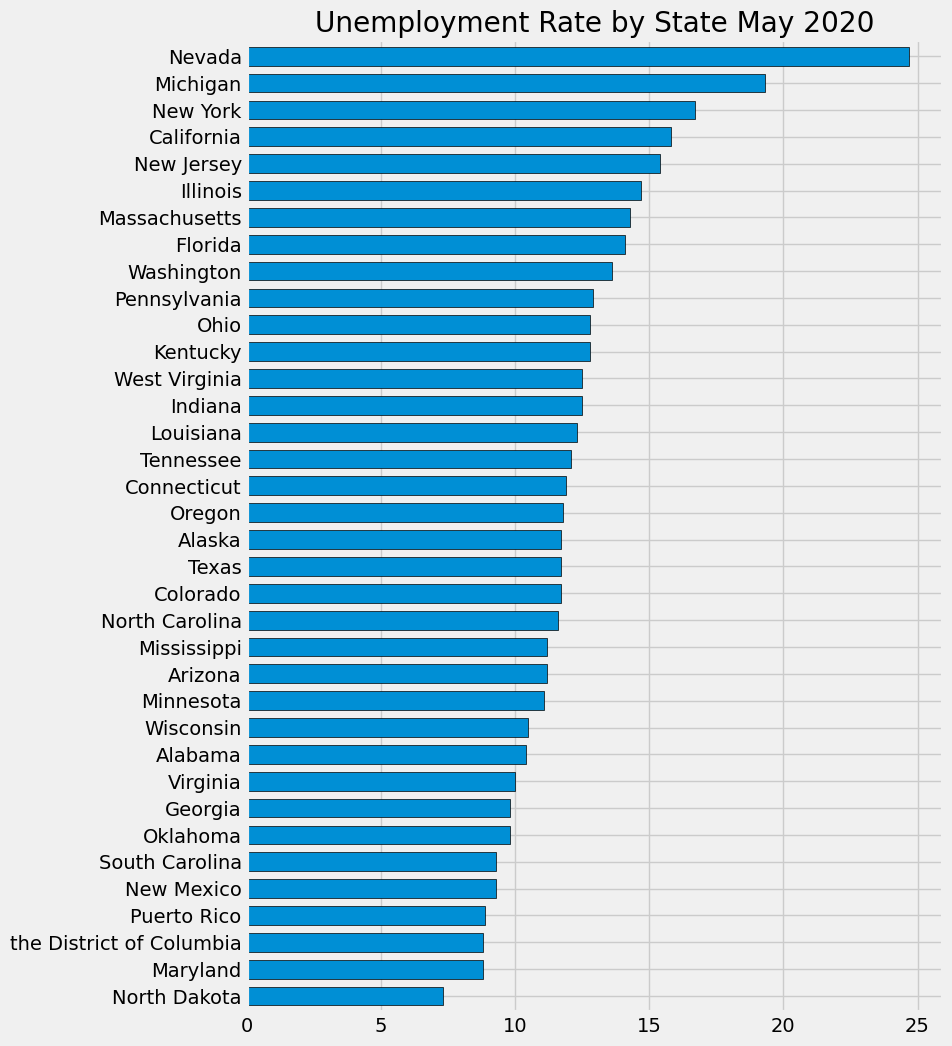

In [299]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01')\
    .plot(kind='barh', figsize=(8,12), width=0.7, edgecolor='black', title='Unemployment Rate by State May 2020')
ax.legend().remove()

## Pull Participation Rate

In [311]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for ')]
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2025-10-16,2025-10-16,Labor Force Participation Rate for California,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:02-05:00,20,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2025-10-16,2025-10-16,Labor Force Participation Rate for Alabama,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:11-05:00,15,A state's labor-force participation rate is th...
LBSSA13,LBSSA13,2025-10-16,2025-10-16,Labor Force Participation Rate for Georgia,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:03-05:00,27,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2025-10-16,2025-10-16,Labor Force Participation Rate for Mississippi,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:06-05:00,18,A state's labor-force participation rate is th...
LBSSA25,LBSSA25,2025-10-16,2025-10-16,Labor Force Participation Rate for Massachusetts,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:05-05:00,23,A state's labor-force participation rate is th...
LBSSA22,LBSSA22,2025-10-16,2025-10-16,Labor Force Participation Rate for Louisiana,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:04-05:00,21,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2025-10-16,2025-10-16,Labor Force Participation Rate for Texas,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:02-05:00,22,A state's labor-force participation rate is th...
LBSSA42,LBSSA42,2025-10-16,2025-10-16,Labor Force Participation Rate for Pennsylvania,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:05-05:00,21,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2025-10-16,2025-10-16,Labor Force Participation Rate for New York,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:01:03-05:00,21,A state's labor-force participation rate is th...


In [315]:
id_to_state_part = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [id_to_state_part[c] for c in part_states.columns]

## Plot Unemployment vs Participation

In [400]:
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District of Columbia'})

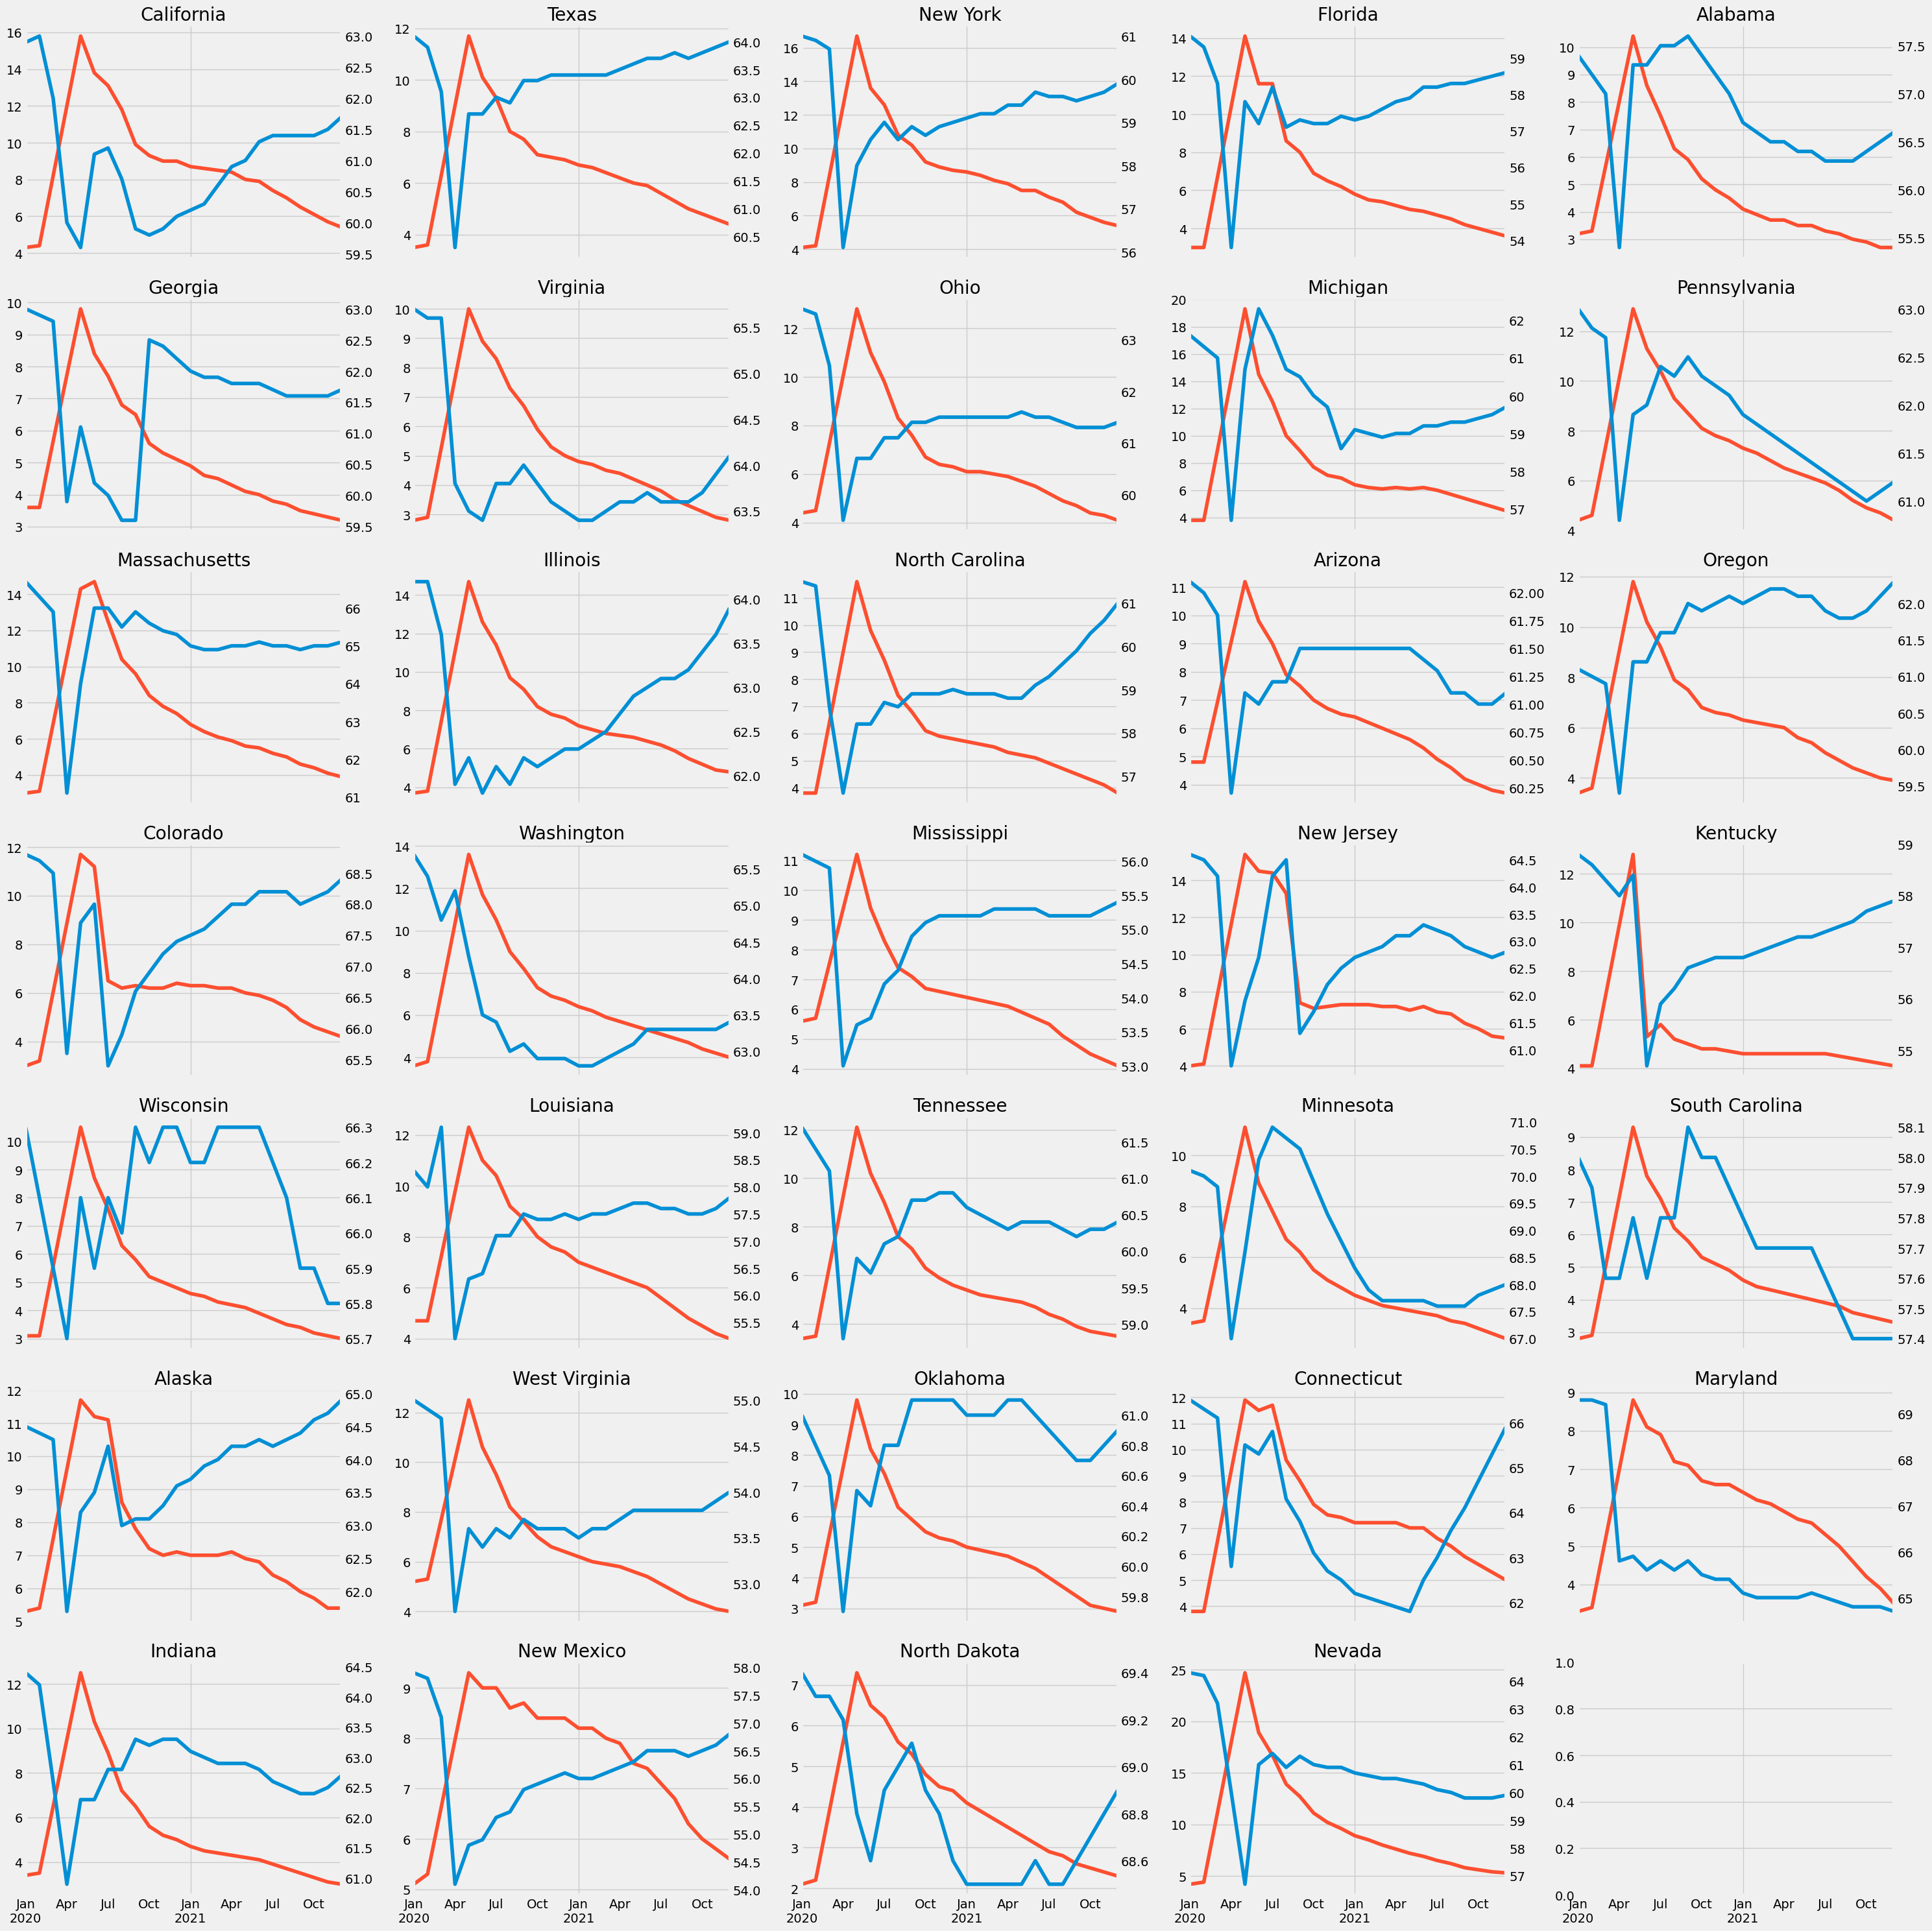

In [411]:
fig, axs = plt.subplots(7,5, figsize=(30,30), sharex = True)
axs = axs.flatten()
i = 0
for state in unemp_states.columns:
        if state in['District of Columbia','Puerto Rico']:
            continue
        ax2 = axs[i].twinx()
        part_states.query('index >= 2020 and index < 2022')[state]\
            .plot(ax = ax2, label='Participation')
        unemp_states.query('index >= 2020 and index < 2022')[state]\
            .plot(ax = axs[i], label='Unemployment', color=color_pal[1])
        ax2.grid(False)
        axs[i].set_title(state)
        i+=1
plt.tight_layout()
plt.show()